In [ ]:
#pip install langchain langgraph langsmith langchain_groq langchain_community

In [ ]:
groq_api_key = "enter api "

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "Gemma2-9b-it")

In [9]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END 

In [10]:
class State(TypedDict):
    messages:Annotated[list,add_messages] 
    
graph_builder=StateGraph(State)

In [11]:
graph_builder

In [12]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [13]:
graph_builder.add_node('chatbot',chatbot)

In [14]:
graph_builder

In [15]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

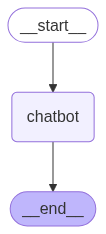

In [16]:
graph_builder.compile()

In [17]:
graph = graph_builder.compile()

In [20]:
while True:
    user_input=input("user:")
    if user_input.lower() in ['quit','q']:
        print('Good Bye, thank you using LangGrpah Framework create by prakash senapati')
        break 
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:',value['messages'].content)

dict_values([{'messages': AIMessage(content="Let's break down the differences between MCP and A2A agents in the context of artificial intelligence and reinforcement learning.\n\n**MCP (Model-Conditional Policy)**\n\n* **Core Idea:** MCP agents learn by combining a separate value function (estimating the expected return) with a policy network. The policy network's decisions are directly influenced by the predicted value from the value function.\n* **How it Works:**\n    1. **Value Function:**  The value function estimates the long-term reward an agent can expect to receive from a given state. It's often trained using techniques like Q-learning or SARSA.\n    2. **Policy Network:** This network takes a state as input and outputs an action, but crucially, it incorporates the value function's prediction.  Actions with higher expected values are more likely to be chosen.\n\n* **Advantages:**\n    * **Improved Exploration:** By considering the value function, MCP agents can balance explorati